# Machine Learning A-Z: Section 4 Simple Linear Regression

This section of the course focuses on how to do simple linear regressions. 

Regressions in general are used for predicting a real numerical value such as the value of a car. Linear regressions try to predict the missing value by fitting a line to the known data, then calculating a best guess of the missing data based on the indepent variables for that point. Linear regression finds the line of best fit by minimizing the distance of each known point to the fit line.

## Step 1: Prepare the Data

Here we use the preprocessing template we made in Section 2.

In [1]:
import numpy as np # Libraries for fast linear algebra and array manipulation
import pandas as pd # Import and manage datasets
from plotly import __version__ as py__version__
import plotly.express as px # Libraries for ploting data
import plotly.graph_objects as go # Libraries for ploting data
from sklearn import __version__ as skl__version__
from sklearn.model_selection import train_test_split # Library to split data into training and test sets.
from sklearn.linear_model import LinearRegression # Library for creating Linear Regression Models

Library versions used in this code:

In [2]:
print('Numpy: ' + np.__version__)
print('Pandas: ' + pd.__version__)
print('Plotly: ' + py__version__)
print('Scikit-learn: ' + skl__version__)

Numpy: 1.16.4
Pandas: 0.25.1
Plotly: 4.0.0
Scikit-learn: 0.21.2


In [3]:
def LoadData():
    dataset = pd.read_csv('Salary_Data.csv')
    return dataset

dataset = LoadData()
print(dataset.head(3))
print()
print(dataset.info())

   YearsExperience   Salary
0              1.1  39343.0
1              1.3  46205.0
2              1.5  37731.0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
YearsExperience    30 non-null float64
Salary             30 non-null float64
dtypes: float64(2)
memory usage: 608.0 bytes
None


In [4]:
X = dataset.iloc[:,:-1].values # All the columns except the last are features
y = dataset.iloc[:,-1].values # The last column is the dependent variable

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 1/3, random_state = 42)

Note that in this case we skipped the following sections of preprocessing:
* Missing Data - The dataset is complete with no missing data
* Categorical Variables - The dataset only contains numerical variables
* Feature Scaling - The simple linear regression libraries used here do not require prescaled data

## Step 2: Fit a Simple Linear Regression Model

In [6]:
regressor = LinearRegression() #Create a Linear Regression model
regressor.fit(X_train, y_train) #Train the Linear Regression model on the training data

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Pretty simple here! The model has now fitted a line which is the best fit line to the training data.

## Step 3: Evaluate the Performance of the Model
We now need to evaluate the performance of the model be looking the values the model predicts for for X_train and X_test and compare to the actual values.

In [7]:
y_pred_train = regressor.predict(X_train)

print('Training Set:')
print('Predicted\tActual\t\tDifference')
for p,a in zip(y_pred_train, y_train):
    print('{0:.0f}\t\t{1:.0f}\t\t{2:.0f}'.format(p,a,p-a))

y_pred_test = regressor.predict(X_test)

print()
print('Test Set:')
print('Predicted\tActual\t\tDifference')
for p,a in zip(y_pred_test, y_test):
    print('{0:.0f}\t\t{1:.0f}\t\t{2:.0f}'.format(p,a,p-a))

Training Set:
Predicted	Actual		Difference
46062		39891		6171
73397		66029		7368
52660		56642		-3982
63971		57081		6890
63028		55794		7234
99790		101302		-1512
37578		46205		-8627
39463		37731		1732
110159		105582		4577
44176		43525		651
92249		98273		-6024
114872		116969		-2097
80938		81363		-425
124298		121872		2426
89421		91738		-2317
55488		54445		1043
62086		63218		-1132
67742		61111		6631
81881		93940		-12059
53602		60150		-6548

Test Set:
Predicted	Actual		Difference
115814		112635		3179
71512		67938		3574
102618		113812		-11194
75282		83088		-7806
55488		64445		-8957
60201		57189		3012
122413		122391		22
107331		109431		-2100
63028		56957		6071
35693		39343		-3650


If you look at the results, it seems to have done an okay job. In step 4 we'll graph the data to get a better understanding of the results.

## Step 4: Analyze Results

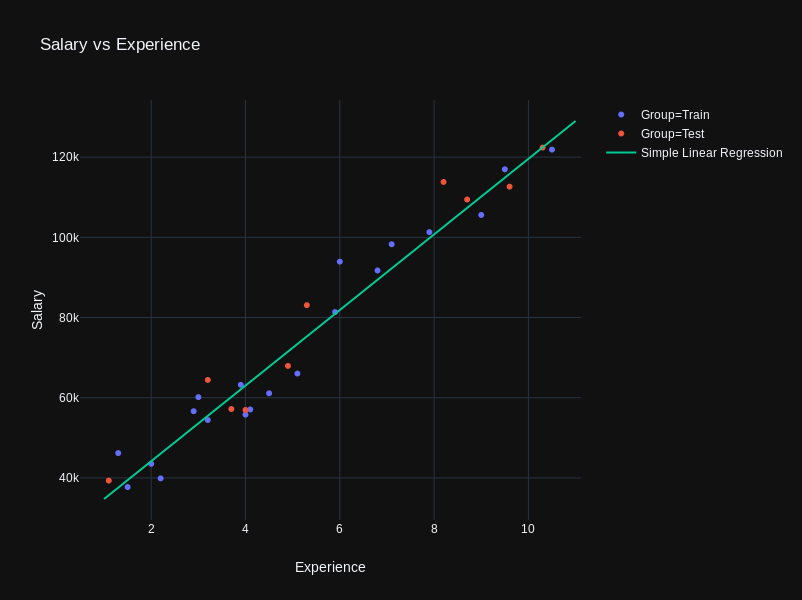

In [10]:
results = pd.DataFrame({'Experience':X_train.flatten(), 'Salary':y_train.flatten(), 'Group':['Train' for i in range(len(y_train))]})
results = results.append(pd.DataFrame({'Experience':X_test.flatten(), 'Salary':y_test.flatten(), 'Group':['Test' for i in range(len(y_test))]}), ignore_index = True)

fig = px.scatter(results, x='Experience', y='Salary', color='Group', template = 'plotly_dark', title='Salary vs Experience')
fig.add_trace(go.Scatter(x = [1,11], y=regressor.predict([[1],[11]]), mode="lines", name="Simple Linear Regression"))
fig.show()

Our model seems to be giving good predections for salary based on experience. Let have a quick look at the residuals

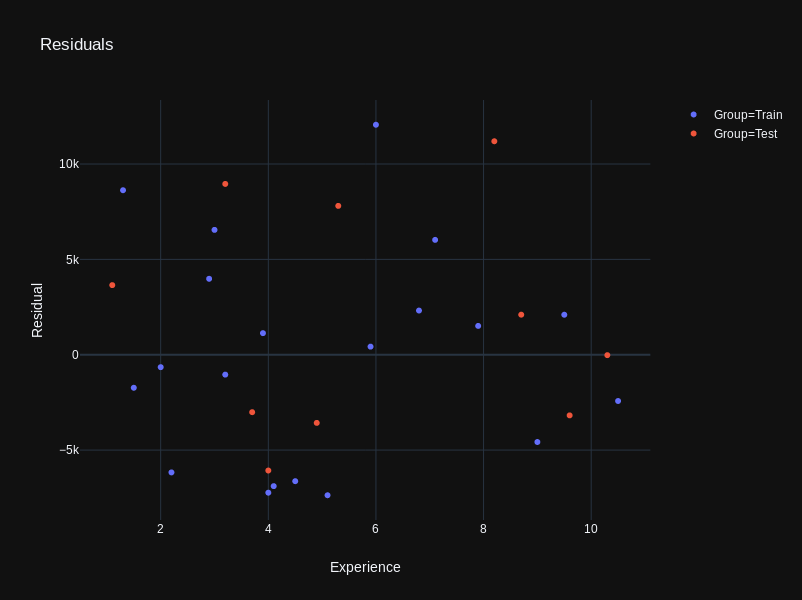

In [16]:
results['Residual'] = results['Salary'] - np.append(y_pred_train, y_pred_test).flatten()

residual_plot = px.scatter(results, x = 'Experience', y = 'Residual', color = 'Group', template='plotly_dark', title = 'Residuals').show()

Overall the residuals plot looks evenly distributed with no remaining relationship between experience and salary. Hence the remaining variation must be a result of other factors for which we do not have data. It also appears that our model may err slightly on the low side.